# Pandas

Pandas is a python library commonly used for analyzing, cleaning, and manipulating data.  More info is available here: https://pandas.pydata.org/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We've learned about multiple data structures (lists, numpy arrays, etc.).  Now we will explore two new data structures contained within Pandas.:
 * Pandas `Series` (a single "column" of data)
 * Pandas `DataFrame` (a table of data with multiple columns/rows)

## Pandas `Series`

A `Series` is similar to a one-dimensional array, which contains a single variable type.

In [2]:
import pandas as pd

s = pd.Series([77134,76424,33104,13441,36505,29176,34994])
s

0    77134
1    76424
2    33104
3    13441
4    36505
5    29176
6    34994
dtype: int64

This particular `Series` contains elements of type `int64` which are indexed by integers 0-6.

`Series` objects have `index` and `values` attributes which allow you to extract the indices and values separately.

In [3]:
s.index

RangeIndex(start=0, stop=7, step=1)

In [4]:
s.values

array([77134, 76424, 33104, 13441, 36505, 29176, 34994])

To access an individual element, use the corresponding index.

In [5]:
s[4]

36505

`Series` objects can also be sliced to obtain a subset of the data.

In [6]:
s[1:3]

1    76424
2    33104
dtype: int64

### `Series` descriptive index

Unlike numpy `array`s, Pandas `Series` also allow you to use a more descriptive index.  For example, the numbers listed above could be the population of various Oklahoma towns. Therefore, we can assign a `list` with the names of these towns to the `Series` using its `index` attribute.

In [7]:
s.index = ["Oklahoma City", "Tulsa", "Norman", "Goldsby", "Noble", "Newcastle", "Moore"]

s

Oklahoma City    77134
Tulsa            76424
Norman           33104
Goldsby          13441
Noble            36505
Newcastle        29176
Moore            34994
dtype: int64

Now, we can get the population of Norman using the original numeric index, or the descriptive (alphanumeric) index we jsut defined.

In [8]:
s[2], s["Norman"]

(33104, 33104)

We can also give a descriptive name to the `Series` object using the `name` attribute:

In [9]:
s.name = "Population"

s

Oklahoma City    77134
Tulsa            76424
Norman           33104
Goldsby          13441
Noble            36505
Newcastle        29176
Moore            34994
Name: Population, dtype: int64

This can all be accomplished using the `Series` constructor.

In [10]:
s = pd.Series([77134,76424,33104,13441,36505,29176,34994], name="Population",index=["Oklahoma City", "Tulsa", "Norman", "Goldsby", "Noble", "Newcastle", "Moore"])

s

Oklahoma City    77134
Tulsa            76424
Norman           33104
Goldsby          13441
Noble            36505
Newcastle        29176
Moore            34994
Name: Population, dtype: int64

You can also slice a `Series` to obtain a subset of the data.

In [11]:
s["Norman":"Moore"]

Norman       33104
Goldsby      13441
Noble        36505
Newcastle    29176
Moore        34994
Name: Population, dtype: int64

Or pass a `list` of indices to select specific non-contiguous values.

In [12]:
s[["Norman","Moore"]]

Norman    33104
Moore     34994
Name: Population, dtype: int64

### `Series` statistical methods

Pandas includes a variety of built-in statistical methods that operate on `Series`:

In [13]:
s.median(), s.mean(), s.std(), s.min(), s.max()

(34994.0, 42968.28571428572, 24328.775916010007, 13441, 77134)

There is also a built-in function that gives a summary of several statisical measures:

In [14]:
s.describe()

count        7.000000
mean     42968.285714
std      24328.775916
min      13441.000000
25%      31140.000000
50%      34994.000000
75%      56464.500000
max      77134.000000
Name: Population, dtype: float64

These functions (and others) can also be used to select data that satisfies a particular requirement.

In [15]:
s[ s > s.median()]

Oklahoma City    77134
Tulsa            76424
Noble            36505
Name: Population, dtype: int64

### Plotting a Pandas `Series`

Pandas includes support for plotting with `pyplot`.

<AxesSubplot:>

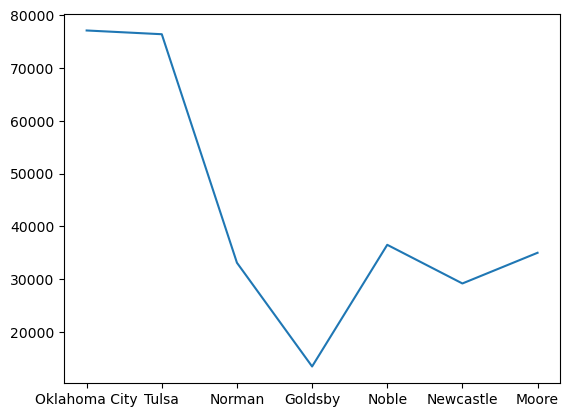

In [16]:
s.plot()

The `kind` argument permits other plot types.

<AxesSubplot:>

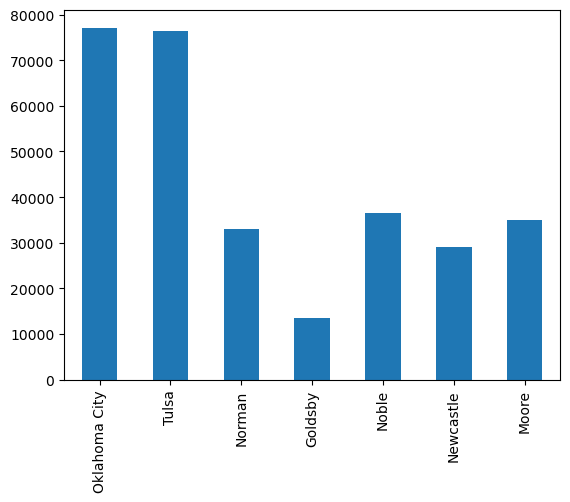

In [17]:
s.plot(kind="bar")

<AxesSubplot:>

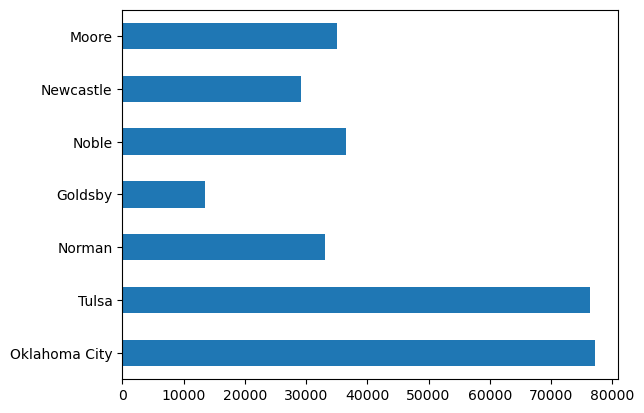

In [18]:
s.plot(kind="barh")

Box plots are used to summarize data in terms of quartiles (the smallest 25% of values fall in the first quartile, the next smallest 25% of values fall in the second quartile, etc).  The median value is represented as a green line.  Surrounding the median, the box represents the extent of the 2nd and 3rd quartiles.  The "whiskers" extend to show the minimum and maximum values, provided they are sufficiently close to the mean.

<AxesSubplot:>

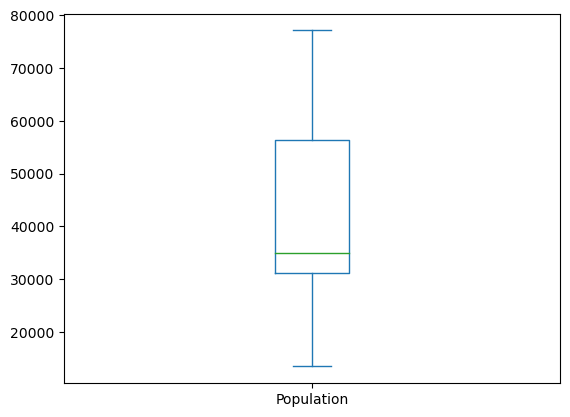

In [19]:
s.plot(kind="box")

Outliers are represented by a dot.

<AxesSubplot:>

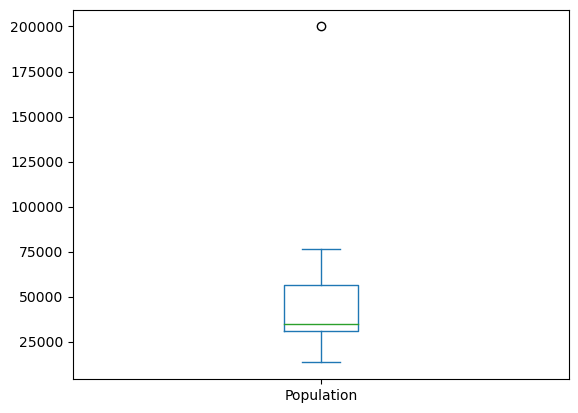

In [20]:
s["Oklahoma City"]=200000

s.plot(kind="box")

<AxesSubplot:ylabel='Population'>

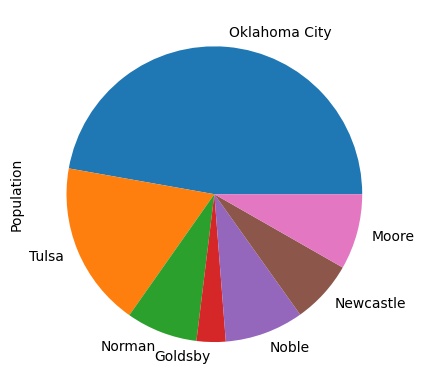

In [21]:
s.plot(kind="pie")

### Manupulating `Series`

You can perform arithmetic operations with `Series` (NB: these operations return a new `Series` with the operation applied - they don't modify the original `Series`).

In [22]:
s*500

Oklahoma City    100000000
Tulsa             38212000
Norman            16552000
Goldsby            6720500
Noble             18252500
Newcastle         14588000
Moore             17497000
Name: Population, dtype: int64

You can add two `Series` together.

In [23]:
s + s

Oklahoma City    400000
Tulsa            152848
Norman            66208
Goldsby           26882
Noble             73010
Newcastle         58352
Moore             69988
Name: Population, dtype: int64

Adding "misaligned" `Series` results in `NaN` for indices not present in both `Series`.

In [24]:
s1 = s[2:]
s2 = s[:-2]

print('s1:',s1,'\ns2:',s2,'\ns1+s2:',s1+s2, sep='\n')

s1:
Norman       33104
Goldsby      13441
Noble        36505
Newcastle    29176
Moore        34994
Name: Population, dtype: int64

s2:
Oklahoma City    200000
Tulsa             76424
Norman            33104
Goldsby           13441
Noble             36505
Name: Population, dtype: int64

s1+s2:
Goldsby          26882.0
Moore                NaN
Newcastle            NaN
Noble            73010.0
Norman           66208.0
Oklahoma City        NaN
Tulsa                NaN
Name: Population, dtype: float64


To avoid this, use the `add()` function with a suitable value of the `fill_value` argument.

In [25]:
s1.add(s2, fill_value=0)

Goldsby           26882.0
Moore             34994.0
Newcastle         29176.0
Noble             73010.0
Norman            66208.0
Oklahoma City    200000.0
Tulsa             76424.0
Name: Population, dtype: float64

You can also call numpy functions on a `Series`.

In [26]:
np.power(s,2)

Oklahoma City    40000000000
Tulsa             5840627776
Norman            1095874816
Goldsby            180660481
Noble             1332615025
Newcastle          851238976
Moore             1224580036
Name: Population, dtype: int64

## Pandas `DataFrame`

`Series` are suitable for representing one-dimensional data. For higher-dimensional data, the `DataFrame` object is appropriate.  It can be viewed as a collection of `Series` objects with a common index.

There are multiple ways to initialize a DataFrame.  We can create a `DataFrame` from information in a csv file.

In [27]:
!head ../Data/Grades.csv

Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,,1,,0,0,,36,3,
0,15,0,1,14,17,1,36,10,1
0,19.5,0,,0,0,,44,10,
0,22.5,0,1,14,16,1,0,9.4,1
0,,0,,0,0,,0,,
0,19,0,1,0,12.5,1,0,,
0,16,7,,0,11,,32,1.5,
0,14,0,1,12,11.8,1,0,7,1
0,23,0,,12,17.6,,42,8.9,1


To do so, we use the `read_csv()` function.

In [28]:
df = pd.read_csv("../Data/Grades.csv")

df

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76,59,14.5,25,1.0,14,12.4,1.0,44,9.8,1.0
77,59,19.0,5,1.0,9,12.5,1.0,38,9.0,1.0
78,59,20.5,22,1.0,14,18.1,1.0,42,8.9,1.0
79,59,22.9,25,NaN,14,19.3,1.0,44,9.0,NaN


The bold text in the first column are the row indices.  The bold text in the first row are the column labels.

Alternatively, we can create a `DataFrame` by calling the constructor with a nested list.

In [29]:
df = pd.DataFrame([[77134,"Oklahoma", 31.3],
                   [76424,"Tulsa",    28.5],
                   [33104,"Cleveland",34.1],
                   [13441,"McClain",  31.2],
                   [36505,"Noble",    30.3],
                   [29176,"McClain",  35.3],
                   [34994,"Cleveland",33.8]])

df

,0,1,2
0,77134,Oklahoma,31.3
1,76424,Tulsa,28.5
2,33104,Cleveland,34.1
3,13441,McClain,31.2
4,36505,Noble,30.3
5,29176,McClain,35.3
6,34994,Cleveland,33.8


After which, we can give the rows a descriptive (alphanumeric) index, and label the columns.

In [30]:
df.index = ["Oklahoma City", "Tulsa", "Norman", "Goldsby", "Noble", "Newcastle", "Moore"]
df.columns = ["Population","County","Mean Age"]

df

,Population,County,Mean Age
Oklahoma City,77134,Oklahoma,31.3
Tulsa,76424,Tulsa,28.5
Norman,33104,Cleveland,34.1
Goldsby,13441,McClain,31.2
Noble,36505,Noble,30.3
Newcastle,29176,McClain,35.3
Moore,34994,Cleveland,33.8


Alternatively, we can pass `lists` to the constructor using the `index` and `columns` arguments to do this in a single command.

In [31]:
# Pass a nested list and label the indices and columns all at once:
df = pd.DataFrame(
    [
        [77134,"Oklahoma", 31.3],
        [76424,"Tulsa",    28.5],
        [33104,"Cleveland",34.1],
        [13441,"McClain",  31.2],
        [36505,"Noble",    30.3],
        [29176,"McClain",  35.3],
        [34994,"Cleveland",33.8]
    ],
    index = ["Oklahoma City", "Tulsa", "Norman", "Goldsby", "Noble", "Newcastle", "Moore"],
    columns = ["Population","County","Mean Age"]
)

df

,Population,County,Mean Age
Oklahoma City,77134,Oklahoma,31.3
Tulsa,76424,Tulsa,28.5
Norman,33104,Cleveland,34.1
Goldsby,13441,McClain,31.2
Noble,36505,Noble,30.3
Newcastle,29176,McClain,35.3
Moore,34994,Cleveland,33.8


We can also create a `DataFrame` by passing a `dictionary` to the constructor, with the column names as keys.  The `dictionary` values should be `lists` of the corresponding data.

In [32]:
df = pd.DataFrame(
    {
        "Population": [77134,76424,33104,13441,36505,29176,34994],
        "County": ["Oklahoma City", "Tulsa", "Cleveland", "McClain", "Noble", "McClain", "Cleveland"],
        "Mean age": [31.3, 28.5, 34.1, 31.2, 30.3, 35.3, 33.8]
    },
    index = ["Oklahoma City", "Tulsa", "Norman", "Goldsby", "Noble", "Newcastle", "Moore"],
)

df

,Population,County,Mean age
Oklahoma City,77134,Oklahoma City,31.3
Tulsa,76424,Tulsa,28.5
Norman,33104,Cleveland,34.1
Goldsby,13441,McClain,31.2
Noble,36505,Noble,30.3
Newcastle,29176,McClain,35.3
Moore,34994,Cleveland,33.8


-----------

You can get information on a `DataFrame` with the `info()` function.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Oklahoma City to Moore
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  7 non-null      int64  
 1   County      7 non-null      object 
 2   Mean age    7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


You can get some general statistical info with the `describe()` function.

In [34]:
df.describe()

,Population,Mean age
count,7.000000,7.000000
mean,42968.285714,32.071429
std,24328.775916,2.407429
min,13441.000000,28.500000
25%,31140.000000,30.750000
50%,34994.000000,31.300000
75%,56464.500000,33.950000
max,77134.000000,35.300000


### Manipulating `DataFrames`

Like `Series`, `DataFrames` have `index` and `values` attributes.

In [35]:
df.index

Index(['Oklahoma City', 'Tulsa', 'Norman', 'Goldsby', 'Noble', 'Newcastle',
       'Moore'],
      dtype='object')

This time, the `values` attribute contains nested `arrays` to represent the data.

In [36]:
df.values

array([[77134, 'Oklahoma City', 31.3],
       [76424, 'Tulsa', 28.5],
       [33104, 'Cleveland', 34.1],
       [13441, 'McClain', 31.2],
       [36505, 'Noble', 30.3],
       [29176, 'McClain', 35.3],
       [34994, 'Cleveland', 33.8]], dtype=object)

The `columns` attribute contains an `array` of the column labels.

In [37]:
df.columns

Index(['Population', 'County', 'Mean age'], dtype='object')

We can access an individual column from a `DataFrame`.  The resulting object is a `Series`.

In [38]:
df["Population"]

Oklahoma City    77134
Tulsa            76424
Norman           33104
Goldsby          13441
Noble            36505
Newcastle        29176
Moore            34994
Name: Population, dtype: int64

Alternatively, we can simply do:

In [39]:
df.Population

Oklahoma City    77134
Tulsa            76424
Norman           33104
Goldsby          13441
Noble            36505
Newcastle        29176
Moore            34994
Name: Population, dtype: int64

We can access an individual row (also returned as a `Series`) using the `loc` "property" (properties are used to access or modify attributes).

In [40]:
df.loc["Norman"]

Population        33104
County        Cleveland
Mean age           34.1
Name: Norman, dtype: object

We can also access rows via their numeric index, using the `iloc` property.

In [41]:
df.iloc[2]

Population        33104
County        Cleveland
Mean age           34.1
Name: Norman, dtype: object

`DataFrame`s also support slicing to obtain a new `DataFrame` with a subset of the original rows.

In [42]:
df["Norman":"Moore"]

,Population,County,Mean age
Norman,33104,Cleveland,34.1
Goldsby,13441,McClain,31.2
Noble,36505,Noble,30.3
Newcastle,29176,McClain,35.3
Moore,34994,Cleveland,33.8


Or equivalently:

In [43]:
df.loc["Norman":"Moore"]

,Population,County,Mean age
Norman,33104,Cleveland,34.1
Goldsby,13441,McClain,31.2
Noble,36505,Noble,30.3
Newcastle,29176,McClain,35.3
Moore,34994,Cleveland,33.8


Alternatively, the `loc` property accepts a `list` of indices.

In [44]:
df.loc[["Norman","Noble"]]

,Population,County,Mean age
Norman,33104,Cleveland,34.1
Noble,36505,Noble,30.3


Passing a second `list` of column labels will generate a `DataFrame` with only those columns.

In [45]:
df.loc[["Norman","Noble"],["Population","Mean age"]]

,Population,Mean age
Norman,33104,34.1
Noble,36505,30.3


We can access an indivudal data value by passing both the index and column label to `loc`.

In [46]:
df.loc["Norman","Population"]

33104

We can apply various statistical functions to `DataFrame` objects (if the `DataFrame` includes non-numeric data, we should pass the arguemnt `numeric_only=True`).

In [47]:
df.mean(numeric_only=True)

Population    42968.285714
Mean age         32.071429
dtype: float64

-----------

We can easily add/modify a `DataFrame` column.

In [48]:
df["Future pop."] = 2 * df["Population"]
df["Mean age"] = df["Mean age"] + 2

df

,Population,County,Mean age,Future pop.
Oklahoma City,77134,Oklahoma City,33.3,154268
Tulsa,76424,Tulsa,30.5,152848
Norman,33104,Cleveland,36.1,66208
Goldsby,13441,McClain,33.2,26882
Noble,36505,Noble,32.3,73010
Newcastle,29176,McClain,37.3,58352
Moore,34994,Cleveland,35.8,69988


The column was added to the end of the `DataFrame`.  To insert a column at another location, use the `insert()` function.  The first argument is the column position (zero-indexed), the second argument is the column label, and the third argument is a value for this column.

In [49]:
df.insert(2,'Time zone','central')

df

,Population,County,Time zone,Mean age,Future pop.
Oklahoma City,77134,Oklahoma City,central,33.3,154268
Tulsa,76424,Tulsa,central,30.5,152848
Norman,33104,Cleveland,central,36.1,66208
Goldsby,13441,McClain,central,33.2,26882
Noble,36505,Noble,central,32.3,73010
Newcastle,29176,McClain,central,37.3,58352
Moore,34994,Cleveland,central,35.8,69988


Columns can be removed using the `pop()` function.  This function also returns the column, as a `Series`.

In [50]:
s = df.pop('Mean age')

print(s, 2*'\n', df)

Oklahoma City    33.3
Tulsa            30.5
Norman           36.1
Goldsby          33.2
Noble            32.3
Newcastle        37.3
Moore            35.8
Name: Mean age, dtype: float64 

                Population         County Time zone  Future pop.
Oklahoma City       77134  Oklahoma City   central       154268
Tulsa               76424          Tulsa   central       152848
Norman              33104      Cleveland   central        66208
Goldsby             13441        McClain   central        26882
Noble               36505          Noble   central        73010
Newcastle           29176        McClain   central        58352
Moore               34994      Cleveland   central        69988


We can combine two `DataFrame`s by passing them to the `concat()` function.  To combine two `DataFrame`s with common indices, we also pass the argument `axis=1` to concatenate along columns.

In [51]:
df2 = pd.DataFrame(
    {
        "Area": [621, 201, 189.2],
    },
    index = ["Oklahoma City", "Tulsa", "Norman"],
)

pd.concat([df,df2],axis=1)

,Population,County,Time zone,Future pop.,Area
Oklahoma City,77134,Oklahoma City,central,154268,621.0
Tulsa,76424,Tulsa,central,152848,201.0
Norman,33104,Cleveland,central,66208,189.2
Goldsby,13441,McClain,central,26882,NaN
Noble,36505,Noble,central,73010,NaN
Newcastle,29176,McClain,central,58352,NaN
Moore,34994,Cleveland,central,69988,NaN


To combine two `DataFrames` with common columns, use `axis=0` concatenates along rows.

In [52]:
df3 = pd.DataFrame(
    {
        "Population": [1288000, 2228000, 964177],
    },
    index = ["Dallas", "Houston", "Austin"],
)

pd.concat([df,df3],axis=0)

,Population,County,Time zone,Future pop.
Oklahoma City,77134,Oklahoma City,central,154268.0
Tulsa,76424,Tulsa,central,152848.0
Norman,33104,Cleveland,central,66208.0
Goldsby,13441,McClain,central,26882.0
Noble,36505,Noble,central,73010.0
Newcastle,29176,McClain,central,58352.0
Moore,34994,Cleveland,central,69988.0
Dallas,1288000,NaN,NaN,NaN
Houston,2228000,NaN,NaN,NaN
Austin,964177,NaN,NaN,NaN


In both cases, `NaN` is inserted for missing entries.

It is sometimes useful to transpose the rows and columns, which can be obtained using the `T` attribute.

In [53]:
df.T

,Oklahoma City,Tulsa,Norman,Goldsby,Noble,Newcastle,Moore
Population,77134,76424,33104,13441,36505,29176,34994
County,Oklahoma City,Tulsa,Cleveland,McClain,Noble,McClain,Cleveland
Time zone,central,central,central,central,central,central,central
Future pop.,154268,152848,66208,26882,73010,58352,69988


You can perform a variety of element-by-element operations on a `DataFrame`.

In [54]:
# boolean comparisons also work
df4 = pd.DataFrame({'alpha' : [1, 0, 1], 'beta' : [5, 2, 0] }, dtype=int)
df5 = pd.DataFrame({'alpha' : [1, 1, 0], 'beta' : [9, 4, 2] }, dtype=int)

df6 = df4 + df5

print("df4:\n", df4,     2*'\n', 
      "df5:\n", df5,     2*'\n', 
      "df6:\n", df6)

df4:
    alpha  beta
0      1     5
1      0     2
2      1     0 

 df5:
    alpha  beta
0      1     9
1      1     4
2      0     2 

 df6:
    alpha  beta
0      2    14
1      1     6
2      1     2


Or

In [55]:
df6 > 5

,alpha,beta
0,False,True
1,False,True
2,False,False


### Example data analysis:

Let's analyze some data on European cities.

In [56]:
!head ../Data/european_cities4.csv

Rank,City,State,Population,Date of census/estimate
1,London[2],United Kingdom,"8,615,246",1-Jun-14
2,Berlin,Germany,"3,437,916",31-May-14
3,Madrid,Spain,"3,165,235",1-Jan-14
4,Rome,Italy,"2,872,086",30-Sep-14
5,Paris,France,"2,273,305",1-Jan-13
6,Bucharest,Romania,"1,883,425",20-Oct-11
7,Vienna,Austria,"1,794,770",1-Jan-15
8,Hamburg[10],Germany,"1,746,342",30-Dec-13
9,Budapest,Hungary,"1,744,665",1-Jan-14


As before, we can read in this csv data with the `read_csv()` function.

In [57]:
df7 = pd.read_csv("https://raw.githubusercontent.com/jstupak/ComputationalPhysics/master/Data/european_cities4.csv")

df7

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1-Jun-14
1,2,Berlin,Germany,"3,437,916",31-May-14
2,3,Madrid,Spain,"3,165,235",1-Jan-14
3,4,Rome,Italy,"2,872,086",30-Sep-14
4,5,Paris,France,"2,273,305",1-Jan-13
...,...,...,...,...,...
100,101,Bonn,Germany,"309,869",31-Dec-12
101,102,Malmö,Sweden,"309,105",31-Mar-13
102,103,Nottingham,United Kingdom,"308,735",30-Jun-12
103,104,Katowice,Poland,"308,269",30-Jun-12


### Cleaning data

Let's get some basic info on the `DataFrame` using the `info()` function.

In [58]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


Although the `Population` column contains integer values, the data is not being treated as integers (because of the commas they are treated as strings).

Given such a string, we can easily convert it to an integer by first replacing all commas with an empty string, and then casting to an `int`.

In [59]:
population = "8,615,246"

int(population.replace(',',''))

8615246

As we have seen, it is straightforward to apply numpy functions to a `DataFrame` element-by-element.  However, the functions we wish to apply here are not numpy functions, so we must instead use the Pandas `apply()` function.

We first define a function which performs the desired operation.

In [60]:
def strToInt(my_string):
    return int(my_string.replace(',', ''))

# Test the function
strToInt(population)

8615246

We can then call `apply()` on the `Population` column, with this function as argument.

In [61]:
df7["Population"].apply(strToInt)

0      8615246
1      3437916
2      3165235
3      2872086
4      2273305
        ...   
100     309869
101     309105
102     308735
103     308269
104     306888
Name: Population, Length: 105, dtype: int64

However, this merely creates a new `Series` with `dtype = int64`.  To modify our `DataFrame`, we must assign this to the `Population` column.

In [62]:
df7["Population"] = df7["Population"].apply(strToInt)

df7

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,8615246,1-Jun-14
1,2,Berlin,Germany,3437916,31-May-14
2,3,Madrid,Spain,3165235,1-Jan-14
3,4,Rome,Italy,2872086,30-Sep-14
4,5,Paris,France,2273305,1-Jan-13
...,...,...,...,...,...
100,101,Bonn,Germany,309869,31-Dec-12
101,102,Malmö,Sweden,309105,31-Mar-13
102,103,Nottingham,United Kingdom,308735,30-Jun-12
103,104,Katowice,Poland,308269,30-Jun-12


Let's confirm that the `Population` column contains integers now.

In [63]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    int64 
 4   Date of census/estimate  105 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.2+ KB


### Changing indices

Currently, the rows are indexed with integers.  Let's use the city names as the indices.

We can "promote" an existing column to serve as indices by passing the column label to the `set_index()` function.  NB: this does not modify the `DataFrame` in place.

In [64]:
df7 = df7.set_index("City")

df7

,Rank,State,Population,Date of census/estimate
City,,,,
London[2],1,United Kingdom,8615246,1-Jun-14
Berlin,2,Germany,3437916,31-May-14
Madrid,3,Spain,3165235,1-Jan-14
Rome,4,Italy,2872086,30-Sep-14
Paris,5,France,2273305,1-Jan-13
...,...,...,...,...
Bonn,101,Germany,309869,31-Dec-12
Malmö,102,Sweden,309105,31-Mar-13
Nottingham,103,United Kingdom,308735,30-Jun-12


Now we can access rows using the city name as index.

In [65]:
df7.loc["Madrid"]

Rank                              3
State                         Spain
Population                  3165235
Date of census/estimate    1-Jan-14
Name: Madrid, dtype: object

#### Exercise

Choose 5 cities from the dataframe and make a plot comparing the population of each city using a pie chart

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
df7[:5].Population.plot(kind="pie")
plt.ylabel("")
```
    
</details>

### Sorting `DataFrame`s

It is often convenient to sort a `DataFrame`.  To sort based on the values in a particular column, pass the column label as an argument to the `sort_values()` function.

In [66]:
df7 = df7.sort_values(by=['State'])

df7

,Rank,State,Population,Date of census/estimate
City,,,,
Vienna,7,Austria,1794770,1-Jan-15
Antwerp,59,Belgium,510610,1-Jan-14
Brussels[17],16,Belgium,1175831,1-Jan-14
Varna,85,Bulgaria,335819,31-Dec-13
Plovdiv,84,Bulgaria,341041,31-Dec-13
...,...,...,...,...
Liverpool,64,United Kingdom,469690,30-Jun-12
Wakefield,91,United Kingdom,327627,30-Jun-12
Bristol,69,United Kingdom,432451,30-Jun-12


To instead sort by the indices, use the `sort_index()` function.

In [67]:
df7 = df7.sort_index()

df7

,Rank,State,Population,Date of census/estimate
City,,,,
Aarhus,92,Denmark,326676,1-Oct-14
Alicante,86,Spain,334678,1-Jan-12
Amsterdam,23,Netherlands,813562,31-May-14
Antwerp,59,Belgium,510610,1-Jan-14
Athens,34,Greece,664046,24-May-11
...,...,...,...,...
Wrocław,35,Poland,632432,31-Mar-14
Wuppertal,83,Germany,342885,31-Dec-12
Zagreb,24,Croatia,790017,31-Mar-11


### Multi-indexing

Pandas allows you to define two columns as indices.

In [68]:
df7 = df7.reset_index()
df7 = df7.set_index(["State","City"])

df7

,,Rank,Population,Date of census/estimate
State,City,,,
Denmark,Aarhus,92,326676,1-Oct-14
Spain,Alicante,86,334678,1-Jan-12
Netherlands,Amsterdam,23,813562,31-May-14
Belgium,Antwerp,59,510610,1-Jan-14
Greece,Athens,34,664046,24-May-11
...,...,...,...,...
Poland,Wrocław,35,632432,31-Mar-14
Germany,Wuppertal,83,342885,31-Dec-12
Croatia,Zagreb,24,790017,31-Mar-11


This allows you to sort based on both indices.

In [69]:
df7 = df7.sort_index()

df7

Rank  Population Date of census/estimate
State          City                                                  
Austria        Vienna           7     1794770                1-Jan-15
Belgium        Antwerp         59      510610                1-Jan-14
               Brussels[17]    16     1175831                1-Jan-14
Bulgaria       Plovdiv         84      341041               31-Dec-13
               Sofia           14     1291895               14-Dec-14
...                           ...         ...                     ...
United Kingdom Manchester      58      510772               30-Jun-12
               Nottingham     103      308735               30-Jun-12
               Sheffield       46      557382               30-Jun-12
               Wakefield       91      327627               30-Jun-12
               Wirral          97      320229               30-Jun-12

[105 rows x 3 columns]

You can still access the data by using a single index.

In [70]:
df7.loc["Sweden"]

,Rank,Population,Date of census/estimate
City,,,
Gothenburg,53,528014,31-Mar-13
Malmö,102,309105,31-Mar-13
Stockholm,20,909976,31-Jan-14


Or you can use both indices to obtain a particular `Series`.

In [71]:
df7.loc[("Sweden","Stockholm")]

Rank                              20
Population                    909976
Date of census/estimate    31-Jan-14
Name: (Sweden, Stockholm), dtype: object

#### Exercise 

Make a bar chart containing the population of every city in the United Kingdom

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
df7.loc[("United Kingdom")].Population.plot(kind="bar")
```
    
</details>

We can also sort a `DataFrame` based on the content of other columns, using the `sort_values()` function.

In [72]:
df7.sort_values(["State","Rank"]).head()

Rank  Population Date of census/estimate
State    City                                                  
Austria  Vienna           7     1794770                1-Jan-15
Belgium  Brussels[17]    16     1175831                1-Jan-14
         Antwerp         59      510610                1-Jan-14
Bulgaria Sofia           14     1291895               14-Dec-14
         Plovdiv         84      341041               31-Dec-13

### Counting values

We can call the function `value_counts` to obtain a `Series` of the multiplicity of a given value.

In [73]:
df7 = df7.reset_index()
cityCounts = df7["State"].value_counts()

cityCounts.head()

Germany           19
United Kingdom    16
Spain             13
Italy             10
Poland            10
Name: State, dtype: int64

#### Exercise

Make a horizontal bar chart ("barh") containing the number of cities in the 10 countries with the most cities (hint: you can use slicing on the series we created with value_counts() )

<details>
    <summary style="display:list-item">Click for solution</summary>

```python
city_counts[:10].plot(kind="barh")
plt.xticks(range(1,city_counts.max()+1,2))
```
    
</details>

### Summing data from multiple rows or columns

We can sum the values in a given column corresponding to a particular index by using the `groupby()` and `sum()` functions.

In [75]:
df7 = df7.set_index(["State", "City"])

df8 = df7["Population"].groupby(level=0).sum().sort_values(ascending=False)

df8.tail(10)

State
Greece                      986286
Denmark                     886116
Lithuania                   844040
Croatia                     790017
Latvia                      701185
Finland                     605523
Portugal                    547631
Ireland                     527612
Estonia                     434810
Slovakia Slovak Republic    417389
Name: Population, dtype: int64

#### Exercise

Make a bar chart of the total population of the 10 least populous countries

<details>
  <summary style="display:list-item">Click for solution</summary>

```python
df8[-10:].plot(kind="bar")
```
    
</details>

## Timeseries with pandas

International standard time notation: https://www.cl.cam.ac.uk/~mgk25/iso-time.html

ISO 8601 https://en.wikipedia.org/wiki/ISO_8601

UTC (Coordinated Universal Time)

year-month-day

24 hour clock

hour:minute:second.fraction

In [102]:
data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994',
                 '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071',
                 '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592',
                 '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109',
                 '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877',
                 '2015-01-02 18:47:05.230071', '2015-01-02 18:47:05.280592',
                 '2015-01-03 18:47:05.332662', '2015-01-03 18:47:05.385109',
                 '2016-03-04 18:47:05.436523', '2016-03-04 18:47:05.486877',
                ],
        'count': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41,42,21,52,14,15,26]}
df = pd.DataFrame(data, columns = ['date', 'count'])
df

,date,count
0,2014-05-01 18:47:05.069722,34
1,2014-05-01 18:47:05.119994,25
2,2014-05-02 18:47:05.178768,26
3,2014-05-02 18:47:05.230071,15
4,2014-05-02 18:47:05.230071,15
5,2014-05-02 18:47:05.280592,14
6,2014-05-03 18:47:05.332662,26
7,2014-05-03 18:47:05.385109,25
8,2014-05-04 18:47:05.436523,62
9,2014-05-04 18:47:05.486877,41


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    16 non-null     object
 1   count   16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [104]:
# Convert the date string to a numpy "datetime object"

df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    16 non-null     datetime64[ns]
 1   count   16 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 384.0 bytes


numpy.datetime64

https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.datetime.html

In [105]:
# Set the index of the dataframe to be the date
df = df.set_index('date')

df

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [106]:
# all observations that occured in 2015
df.loc['2015']

,count
date,
2015-01-02 18:47:05.230071,42
2015-01-02 18:47:05.280592,21
2015-01-03 18:47:05.332662,52
2015-01-03 18:47:05.385109,14


In [107]:
df.loc['2014-05-04']

,count
date,
2014-05-04 18:47:05.436523,62
2014-05-04 18:47:05.486877,41


In [108]:
# all dates after 2015-01-01
df["2015/1/1":]

,count
date,
2015-01-02 18:47:05.230071,42
2015-01-02 18:47:05.280592,21
2015-01-03 18:47:05.332662,52
2015-01-03 18:47:05.385109,14
2016-03-04 18:47:05.436523,15
2016-03-04 18:47:05.486877,26


In [109]:
# all dates before 2015-01-01
df[:"2015/1/1"]

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62


In [110]:
# observations between two dates
df['5/3/2014':'5/4/2014']

,count
date,
2014-05-03 18:47:05.332662,26
2014-05-03 18:47:05.385109,25
2014-05-04 18:47:05.436523,62
2014-05-04 18:47:05.486877,41


In [111]:
# remove all observations made on some date and all following
df.truncate(after='5/3/2014')

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25
2014-05-02 18:47:05.178768,26
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.230071,15
2014-05-02 18:47:05.280592,14


In [112]:
# observations on a certain date
df.loc['2014-05-01']

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25


In [113]:
df.loc['05/01/2014']

,count
date,
2014-05-01 18:47:05.069722,34
2014-05-01 18:47:05.119994,25


In [114]:
# group by date
df.groupby(level=0).count()

,count
date,
2014-05-01 18:47:05.069722,1
2014-05-01 18:47:05.119994,1
2014-05-02 18:47:05.178768,1
2014-05-02 18:47:05.230071,2
2014-05-02 18:47:05.280592,1
2014-05-03 18:47:05.332662,1
2014-05-03 18:47:05.385109,1
2014-05-04 18:47:05.436523,1
2014-05-04 18:47:05.486877,1


In [115]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

# Resample time series data by day

df.resample('D')

In [116]:
df2 = df.resample('M').sum()
df2

,count
date,
2014-05-31,283
2014-06-30,0
2014-07-31,0
2014-08-31,0
2014-09-30,0
2014-10-31,0
2014-11-30,0
2014-12-31,0
2015-01-31,129


In [117]:
df2[pd.notnull(df2['count'])]

,count
date,
2014-05-31,283
2014-06-30,0
2014-07-31,0
2014-08-31,0
2014-09-30,0
2014-10-31,0
2014-11-30,0
2014-12-31,0
2015-01-31,129


<AxesSubplot:xlabel='date'>

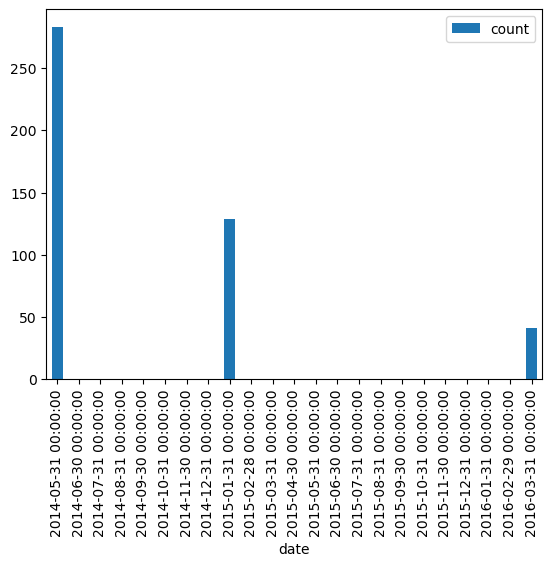

In [118]:
df2[pd.notnull(df2['count'])].plot(kind="bar")

## Time series data with a moderately large dataset (~50000 rows)

New lets look at two input files, each containing two columns: unicode time (time stince 1/1/1970) and the measured temperature (C)


these are tab separated lists, so we will need to set the delimeter  in read_csv with "\t":

In [119]:
!head -n 25 ../Data/temperature_outdoor_2014.tsv

1388530986	4.380000
1388531586	4.250000
1388532187	4.190000
1388532787	4.060000
1388533388	4.060000
1388533988	4.060000
1388534589	4.060000
1388535189	4.060000
1388535790	4.060000
1388536406	3.810000
1388537006	3.620000
1388537607	3.500000
1388538207	3.620000
1388538808	3.620000
1388539408	3.620000
1388540009	3.560000
1388540609	3.620000
1388541210	3.620000
1388541810	3.500000
1388542411	3.380000
1388543012	3.440000
1388543612	3.380000
1388544213	3.310000
1388544813	3.250000
1388545414	3.310000


In [120]:
!head -n 25 ../Data/temperature_indoor_2014.tsv

1388530986	21.940000
1388531586	22.000000
1388532187	22.000000
1388532787	22.000000
1388533388	22.000000
1388533988	22.060000
1388534589	22.120000
1388535189	22.250000
1388535790	22.310000
1388536391	22.440000
1388536991	22.440000
1388537607	22.500000
1388538207	22.440000
1388538808	22.500000
1388539408	22.560000
1388540009	22.560000
1388540609	22.500000
1388541210	22.500000
1388541810	22.560000
1388542411	22.560000
1388543012	22.560000
1388543612	22.500000
1388544213	22.560000
1388544813	22.690000
1388545414	22.690000


In [121]:
df1 = pd.read_csv('https://raw.githubusercontent.com/jstupak/ComputationalPhysics/master/Data/temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])

In [122]:
df2 = pd.read_csv('https://raw.githubusercontent.com/jstupak/ComputationalPhysics/master/Data/temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])

In [123]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [124]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


In [125]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     49548 non-null  int64  
 1   outdoor  49548 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 774.3 KB


In [126]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype                           
---  ------   --------------  -----                           
 0   time     49548 non-null  datetime64[ns, Europe/Stockholm]
 1   outdoor  49548 non-null  float64                         
dtypes: datetime64[ns, Europe/Stockholm](1), float64(1)
memory usage: 774.3 KB


In [127]:
df1 = df1.set_index("time")

df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [128]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [129]:
df2 = df2.set_index("time")

df2.head()

,indoor
time,
2014-01-01 00:03:06+01:00,21.94
2014-01-01 00:13:06+01:00,22.00
2014-01-01 00:23:07+01:00,22.00
2014-01-01 00:33:07+01:00,22.00
2014-01-01 00:43:08+01:00,22.00


In [130]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

In [131]:
df1.index[0:4]

DatetimeIndex(['2014-01-01 00:03:06+01:00', '2014-01-01 00:13:06+01:00',
               '2014-01-01 00:23:07+01:00', '2014-01-01 00:33:07+01:00'],
              dtype='datetime64[ns, Europe/Stockholm]', name='time', freq=None)

<AxesSubplot:xlabel='time'>

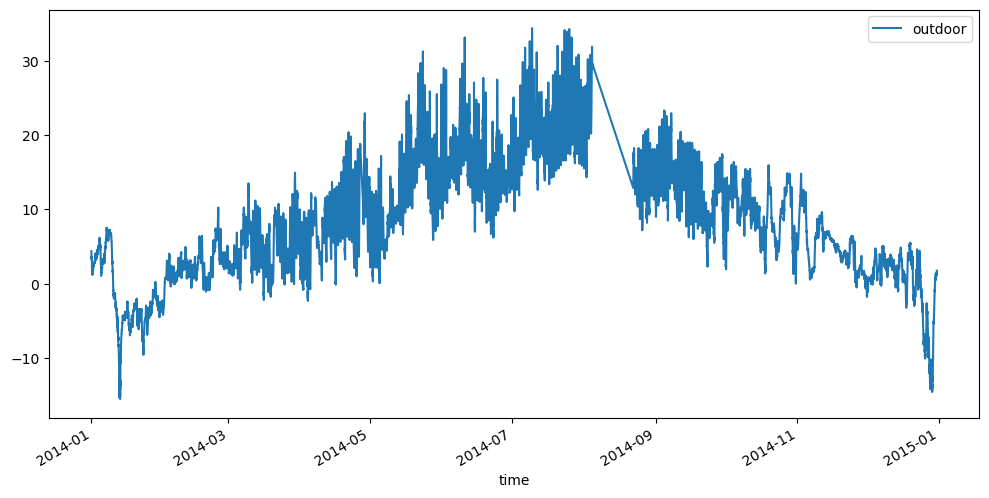

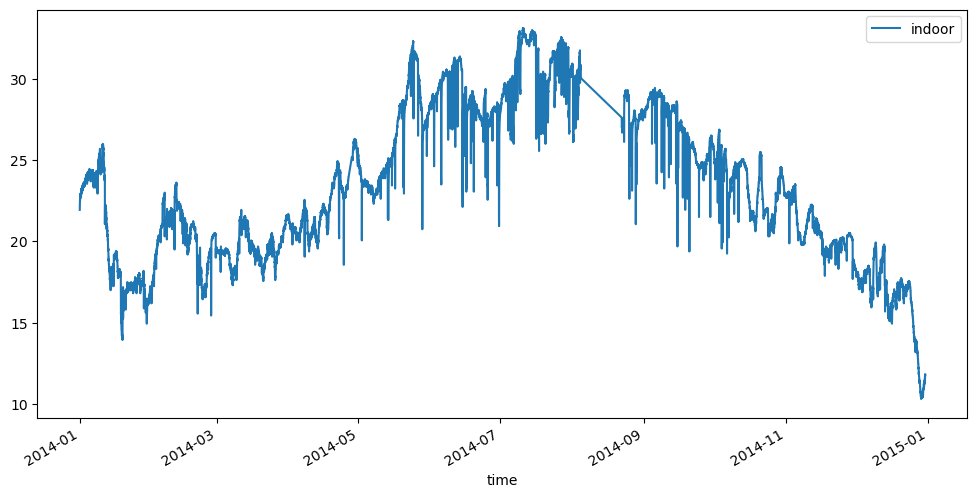

In [132]:
plt.rcParams['figure.figsize'] = 12, 6
df1.plot()
df2.plot()

<AxesSubplot:xlabel='time'>

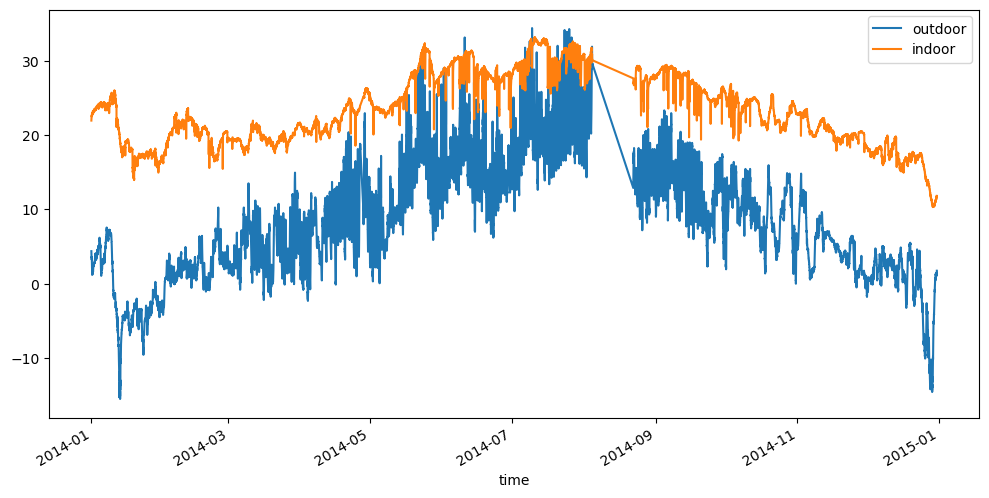

In [133]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df1.plot()
df2.plot(ax=ax)

In [134]:
# Since we have a time series index we can select subsets of the data (returns a boolean array)
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False])

In [135]:
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [136]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  4452 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


In [137]:
# we couild instead selecdt a subset of the data with slicing syntax
df2_jan = df2["2014-1-1":"2014-1-31"]

<AxesSubplot:xlabel='time'>

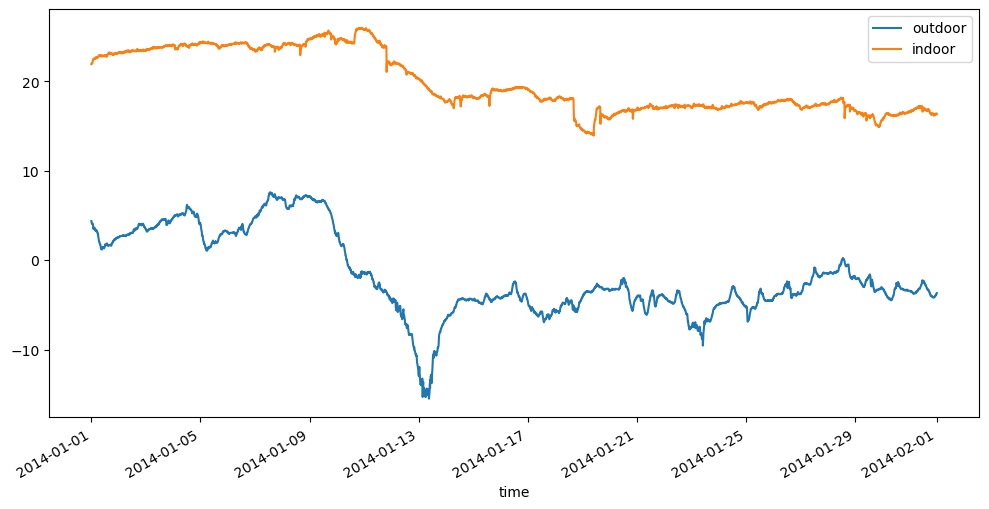

In [138]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df1_jan.plot()
df2_jan.plot(ax=ax)

In [139]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [140]:
# convert an index back into a column so that we can use the apply function on the column
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
df1_month = df1.reset_index()

In [141]:
df1_month.head()

,time,outdoor
0,2014-01-01 00:03:06+01:00,4.38
1,2014-01-01 00:13:06+01:00,4.25
2,2014-01-01 00:23:07+01:00,4.19
3,2014-01-01 00:33:07+01:00,4.06
4,2014-01-01 00:43:08+01:00,4.06


In [142]:
df1_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49548 entries, 0 to 49547
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype                           
---  ------   --------------  -----                           
 0   time     49548 non-null  datetime64[ns, Europe/Stockholm]
 1   outdoor  49548 non-null  float64                         
dtypes: datetime64[ns, Europe/Stockholm](1), float64(1)
memory usage: 774.3 KB


In [143]:
df1_month.loc[0,"time"]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

In [144]:
# use the datetime64 attribute month
df1_month.loc[0,"time"].month

1

In [145]:
df1_month.loc[0,"time"].minute

3

In [146]:
df1_month.loc[0,"time"].second

6

In [147]:
# add a new column containting the month for each row
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

In [148]:
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [149]:
df1_month.tail()

,time,outdoor,month
49543,2014-12-30 23:16:33+01:00,1.56,12
49544,2014-12-30 23:26:33+01:00,1.62,12
49545,2014-12-30 23:36:34+01:00,1.62,12
49546,2014-12-30 23:46:35+01:00,1.62,12
49547,2014-12-30 23:56:35+01:00,1.75,12


Group rows based on the column "month" and calculate a function on each group

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html

In [150]:
df1_month.groupby("month").mean().head(12)

,outdoor
month,
1,-1.776646
2,2.231613
3,4.615437
4,8.105193
5,12.261396
6,15.586955
7,20.780314
8,16.494823
9,12.823905


In [151]:
df1_month_group_agg = df1_month.groupby("month").aggregate(np.mean)

df1_month_group_agg.head(12)

,outdoor
month,
1,-1.776646
2,2.231613
3,4.615437
4,8.105193
5,12.261396
6,15.586955
7,20.780314
8,16.494823
9,12.823905


In [152]:
# Repeat this for the indoor dataset
df2_month = df2.reset_index()
df2_month["month"] = df2_month.time.apply(lambda x: x.month)
df2_month_group_agg = df2_month.groupby("month").aggregate(np.mean)

In [153]:
df2_month_group_agg.head(12)

,indoor
month,
1,19.862590
2,20.231507
3,19.597748
4,22.149754
5,26.332160
6,28.687491
7,30.605333
8,28.099068
9,26.950366


In [154]:
# Join two data frames (create one dataframe with columns from both df1 and df2)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html
df_month = df1_month_group_agg.join(df2_month_group_agg)

In [155]:
df_month.head(10)

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748
4,8.105193,22.149754
5,12.261396,26.332160
6,15.586955,28.687491
7,20.780314,30.605333
8,16.494823,28.099068
9,12.823905,26.950366


_<font color=magenta>----Begin Exercise----</font> _

Make a bar chart containing both the indoor and outdoor temperature

(Hint: you can simply plot our combined month dataframe df_month)

You may want to use grid='true' to make the plot more readable

Make a box plot summarizing the indoor and outside temperature

_<font color=magenta>----End Exercise----</font> _

In [156]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


#### Resampling a timeseries

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html



In [157]:
df1_hour = df1.resample("H").mean()

In [158]:
df1_day = df1.resample("D").mean()

In [159]:
df1_week = df1.resample("7D").mean()

In [160]:
df1_month = df1.resample("M").mean()

In [161]:
df1_week.head(20)

,outdoor
time,
2014-01-01 00:00:00+01:00,3.843320
2014-01-08 00:00:00+01:00,-2.006038
2014-01-15 00:00:00+01:00,-4.358897
2014-01-22 00:00:00+01:00,-3.976842
2014-01-29 00:00:00+01:00,-0.904056
2014-02-05 00:00:00+01:00,1.815616
2014-02-12 00:00:00+01:00,2.195382
2014-02-19 00:00:00+01:00,3.199446
2014-02-26 00:00:00+01:00,2.668042


In [162]:
df1_week=df1_week.rename(columns={"outdoor": "Average weekly outdoor temperature"})

In [163]:
df1_week

,Average weekly outdoor temperature
time,
2014-01-01 00:00:00+01:00,3.843320
2014-01-08 00:00:00+01:00,-2.006038
2014-01-15 00:00:00+01:00,-4.358897
2014-01-22 00:00:00+01:00,-3.976842
2014-01-29 00:00:00+01:00,-0.904056
2014-02-05 00:00:00+01:00,1.815616
2014-02-12 00:00:00+01:00,2.195382
2014-02-19 00:00:00+01:00,3.199446
2014-02-26 00:00:00+01:00,2.668042


In [164]:
df1_hour  = df1_hour.rename(columns={"outdoor": "Average hourly outdoor temperature"})
df1_day   = df1_day.rename(columns={"outdoor": "Average daily outdoor temperature"})
df1_month = df1_month.rename(columns={"outdoor": "Average monthly outdoor temperature"})

In [165]:
df_diff_week = (df1.resample("W").outdoor.mean() - df2.resample("W").indoor.mean())
df_diff_day  = (df1.resample("D").outdoor.mean() - df2.resample("D").indoor.mean())

<AxesSubplot:xlabel='time'>

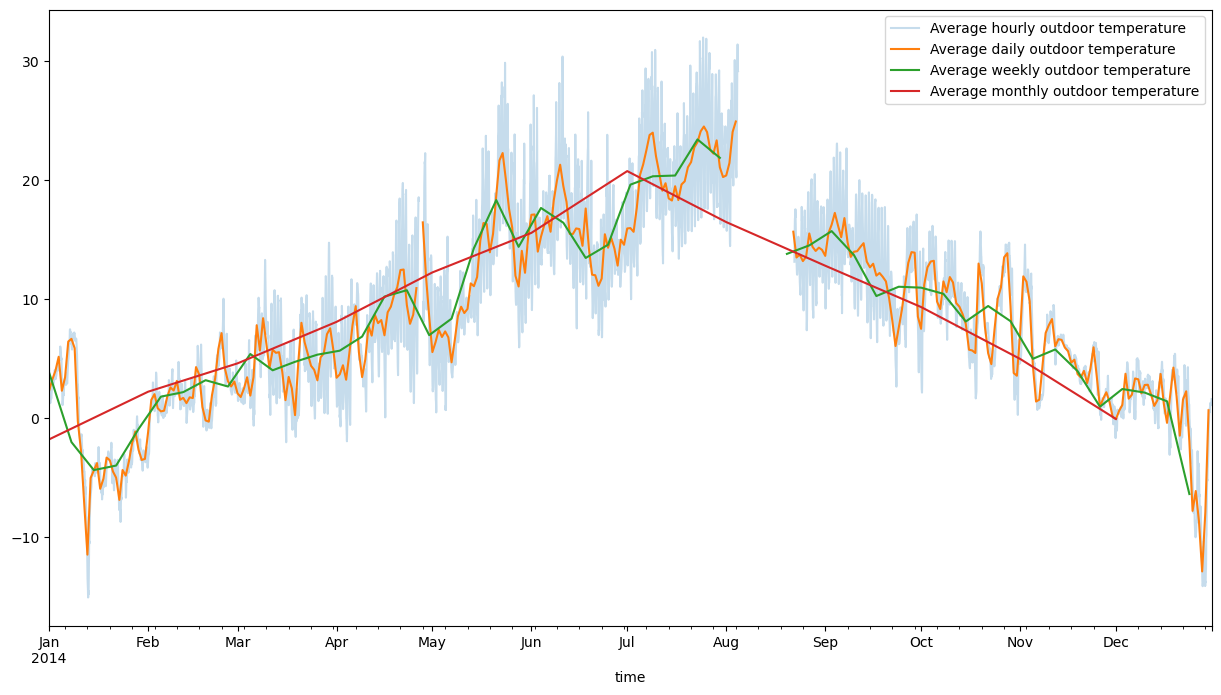

In [166]:
plt.rcParams['figure.figsize'] = 15, 8
ax = df1_hour.plot(alpha=0.25)
df1_day.plot(ax=ax)
df1_week.plot(ax=ax)
df1_month.plot(ax=ax)


<AxesSubplot:xlabel='time'>

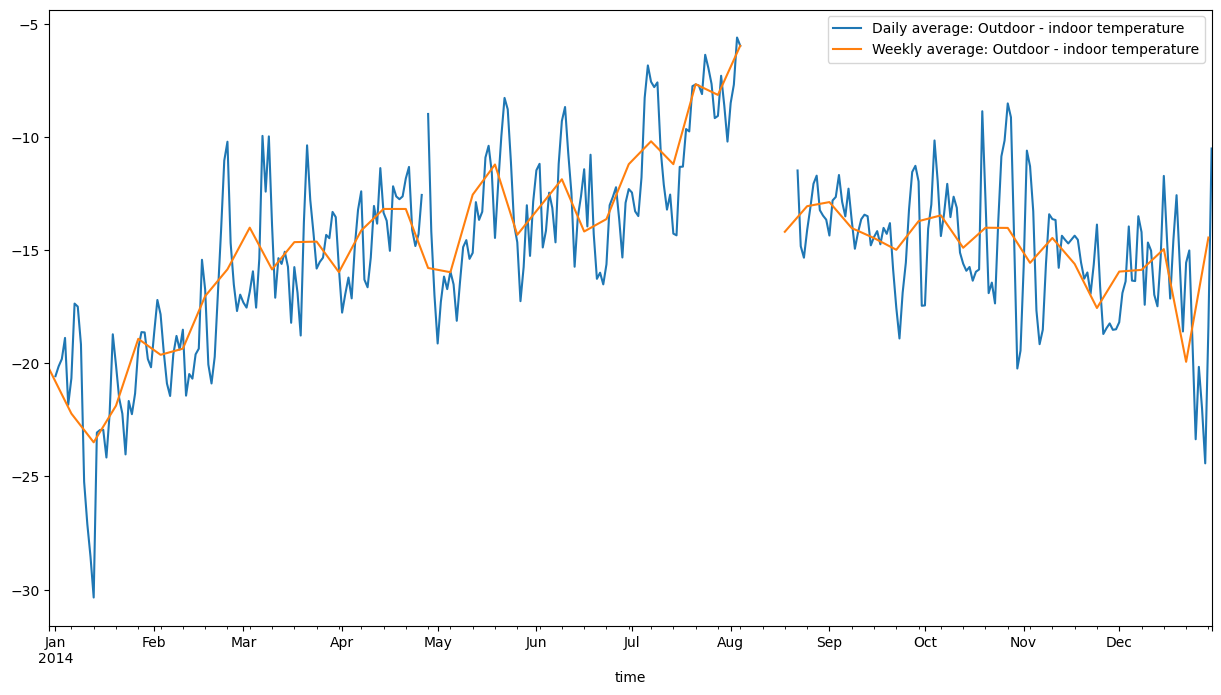

In [167]:
ax2 = df_diff_day.plot(label="Daily average: Outdoor - indoor temperature",legend=True)
df_diff_week.plot(ax=ax2,label="Weekly average: Outdoor - indoor temperature",legend=True)

<AxesSubplot:ylabel='Frequency'>

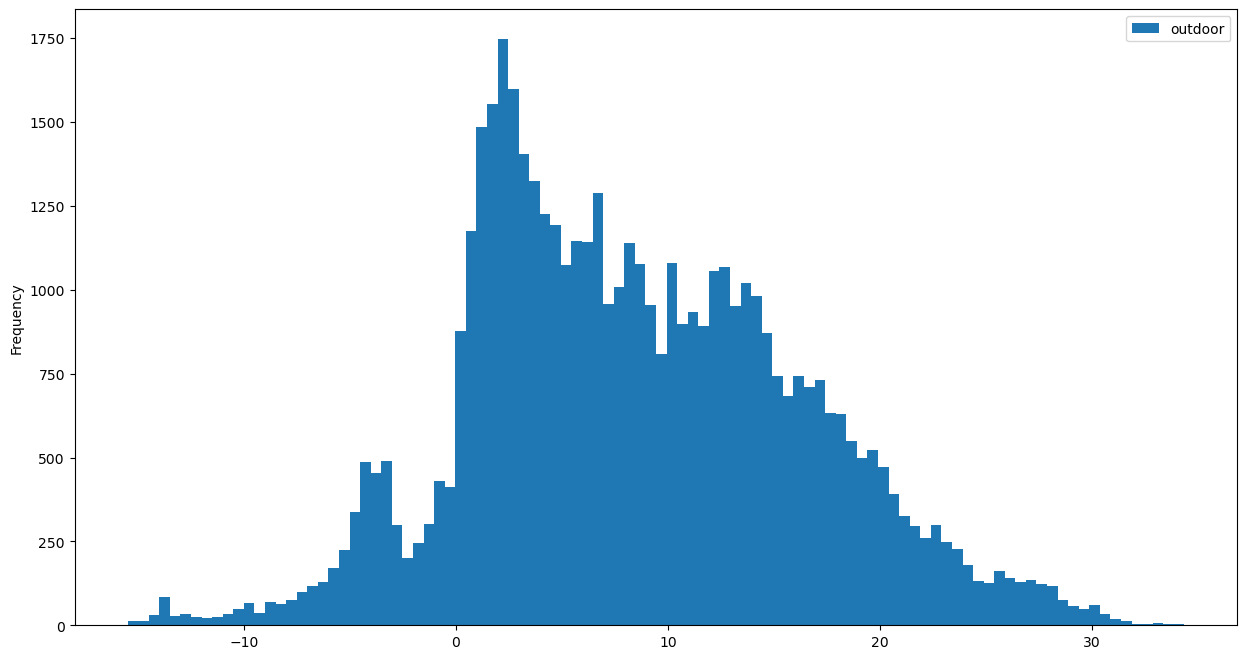

In [168]:
df1.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

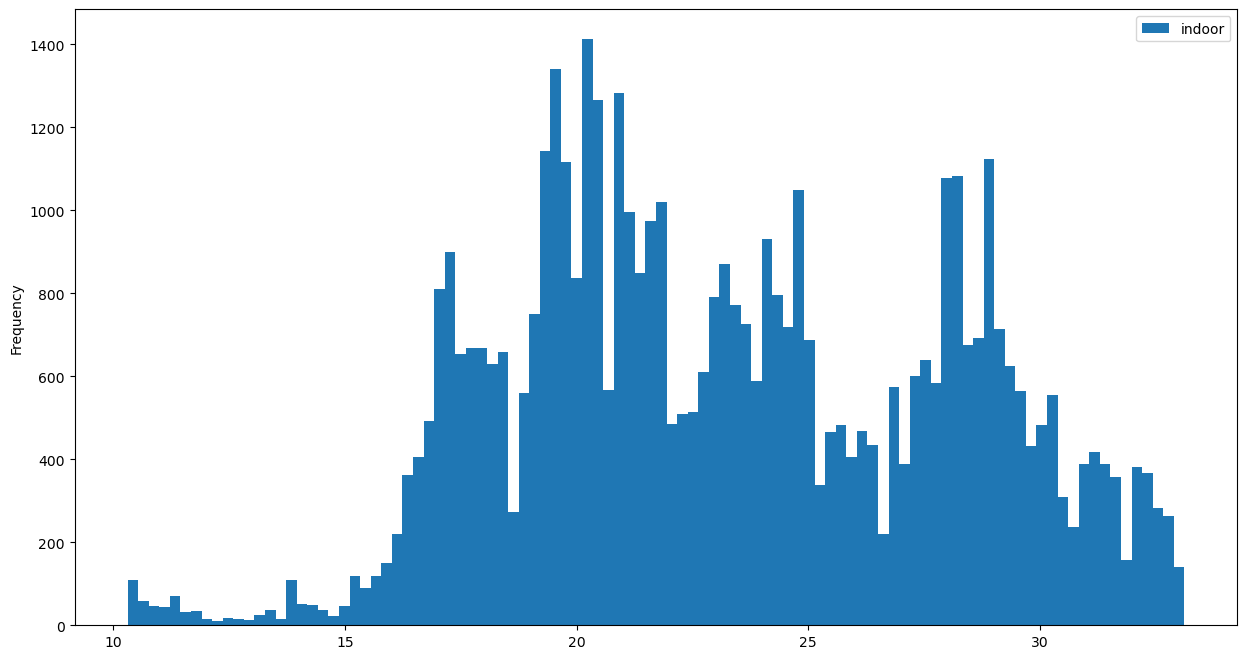

In [169]:
df2.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

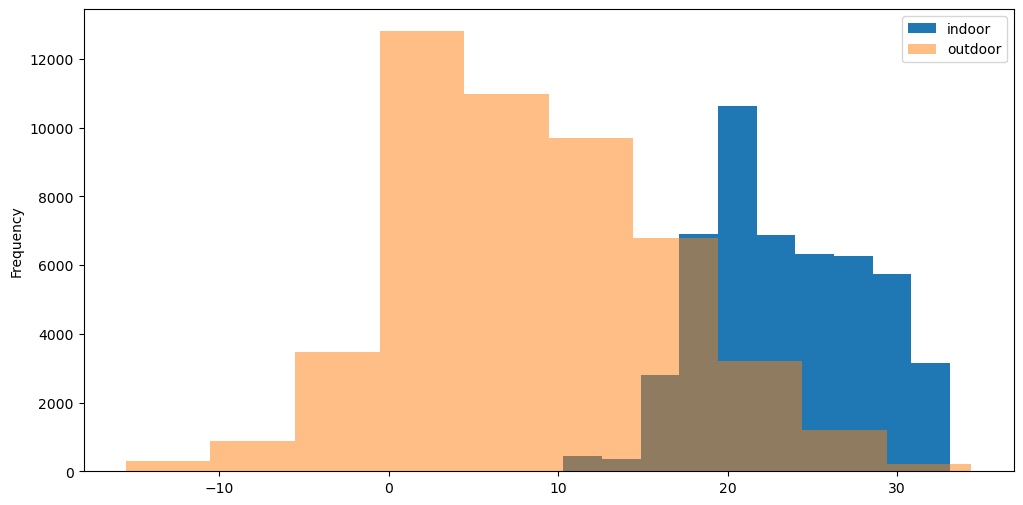

In [170]:
plt.rcParams['figure.figsize'] = 12, 6
ax = df2.plot.hist()
df1.plot.hist(ax=ax,alpha=0.5)

------------------

In [110]:
df2 = pd.read_csv("../Data/Grades.csv")

df2

,Homework1,Quiz1,Homework2,Survey2,Homework3,Quiz2,Survey3,Homework4,Quiz3,Survey4
0,0,NaN,1,NaN,0,0.0,NaN,36,3.0,NaN
1,0,15.0,0,1.0,14,17.0,1.0,36,10.0,1.0
2,0,19.5,0,NaN,0,0.0,NaN,44,10.0,NaN
3,0,22.5,0,1.0,14,16.0,1.0,0,9.4,1.0
4,0,NaN,0,NaN,0,0.0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
76,59,14.5,25,1.0,14,12.4,1.0,44,9.8,1.0
77,59,19.0,5,1.0,9,12.5,1.0,38,9.0,1.0
78,59,20.5,22,1.0,14,18.1,1.0,42,8.9,1.0
79,59,22.9,25,NaN,14,19.3,1.0,44,9.0,NaN
